In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files

# Upload files
uploaded = files.upload()

Saving Alina_y_train_dataset.csv to Alina_y_train_dataset.csv
Saving Alina_y_test_dataset.csv to Alina_y_test_dataset.csv
Saving Alina_X_train_dataset.csv to Alina_X_train_dataset.csv
Saving Alina_X_test_dataset.csv to Alina_X_test_dataset.csv


In [ ]:
import os
print(os.listdir())

['.config', 'Alina_X_test_dataset.csv', 'Alina_X_train_dataset.csv', 'Alina_y_train_dataset.csv', 'Alina_y_test_dataset.csv', 'sample_data']


In [ ]:
# Load the datasets
X_train = pd.read_csv('Alina_X_train_dataset.csv')
X_test = pd.read_csv('Alina_X_test_dataset.csv')
y_train = pd.read_csv('Alina_y_train_dataset.csv')
y_test = pd.read_csv('Alina_y_test_dataset.csv')

In [ ]:
# Ensure y_train and y_test are one-dimensional arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 329.9921523417186
R-squared (R²): 0.012565874132544397



Top 20 Features:
           Feature  Importance
0    overall_score    0.799004
1      joined_club    0.010067
2              age    0.009741
3   position_score    0.007191
4        birthdate    0.007087
5        Composure    0.005840
6       mental_avg    0.005689
7        Reactions    0.005067
8   goalkeeper_avg    0.004518
9       Aggression    0.004306
10          height    0.004233
11       Long Pass    0.004204
12      Shot Power    0.004158
13       GK Diving    0.003986
14    physical_avg    0.003968
15          weight    0.003968
16         Balance    0.003886
17    Sprint Speed    0.003836
18         Jumping    0.003805
19     passing_avg    0.003656


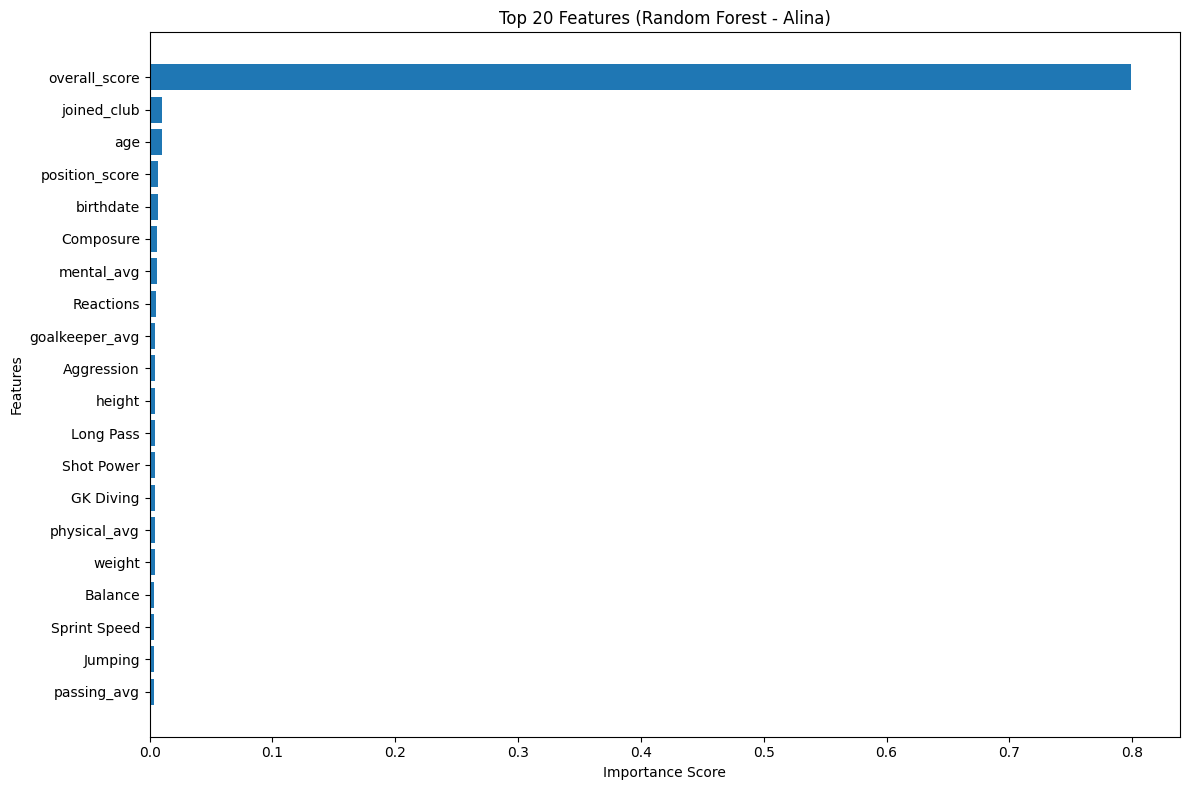

In [ ]:
# Feature Importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sort and Display Top Features
sorted_indices = np.argsort(importances)[::-1]
top_features = pd.DataFrame({
    'Feature': feature_names[sorted_indices],
    'Importance': importances[sorted_indices]
}).head(20)  # Top 20 Features

print("\nTop 20 Features:")
print(top_features)

# Plot the Top 20 Features
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'][::-1], top_features['Importance'][::-1])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 20 Features (Random Forest - Alina)')
plt.tight_layout()
plt.show()

Alina's Top 20 Features - Mean Squared Error: 329.8599335882963
Alina's Top 20 Features - R² Score: 0.012961511750840371


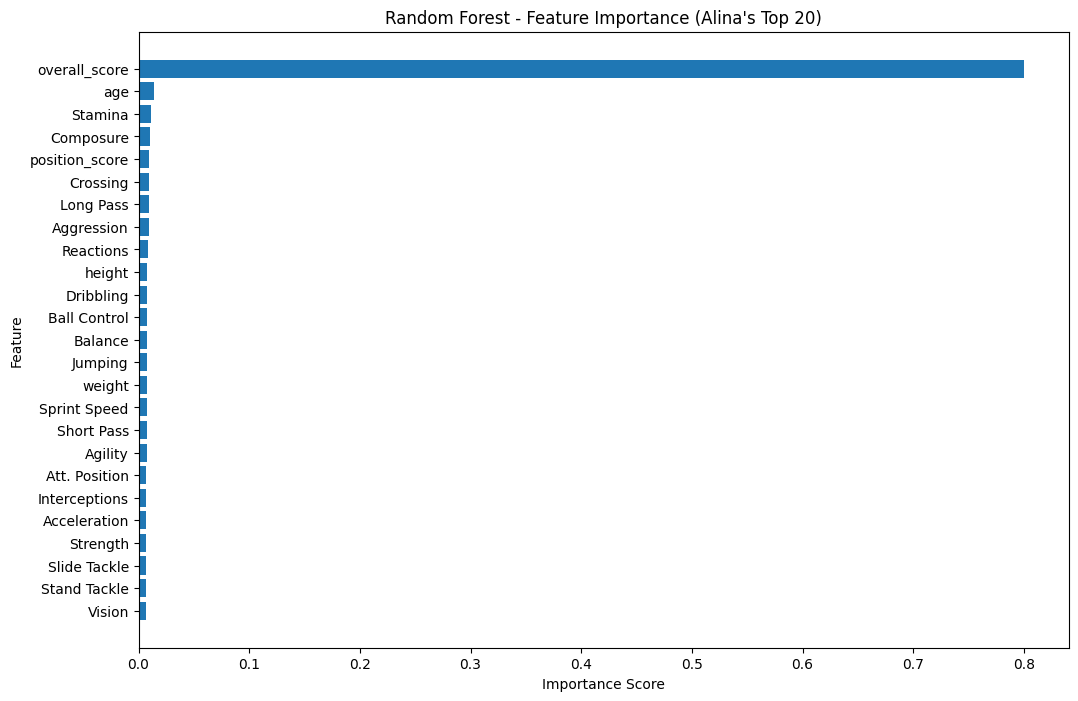

In [ ]:
# Subset data for Alina's top 20 features
alina_features = [
    'overall_score', 'position_score', 'height', 'weight', 'age', 'Ball Control',
    'Dribbling', 'Slide Tackle', 'Stand Tackle', 'Aggression', 'Reactions',
    'Att. Position', 'Interceptions', 'Vision', 'Composure', 'Crossing',
    'Short Pass', 'Long Pass', 'Acceleration', 'Stamina', 'Strength', 'Balance',
    'Sprint Speed', 'Agility', 'Jumping'
]

X_alina_train = X_train[alina_features]
X_alina_test = X_test[alina_features]

# Scale the data
scaler = StandardScaler()
X_alina_train_scaled = scaler.fit_transform(X_alina_train)  # Fit on train data
X_alina_test_scaled = scaler.transform(X_alina_test)        # Transform test data

# Train the Random Forest model
rf_alina_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_alina_model.fit(X_alina_train_scaled, y_train)

# Predict on test data
rf_alina_y_pred = rf_alina_model.predict(X_alina_test_scaled)

# Calculate metrics
rf_alina_mse = mean_squared_error(y_test, rf_alina_y_pred)
rf_alina_r2 = r2_score(y_test, rf_alina_y_pred)

# Print performance metrics
print(f"Alina's Top 20 Features - Mean Squared Error: {rf_alina_mse}")
print(f"Alina's Top 20 Features - R² Score: {rf_alina_r2}")

# Visualize feature importance for Alina's top 20 features
importances = rf_alina_model.feature_importances_
feature_names = X_alina_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Random Forest - Feature Importance (Alina's Top 20)")
plt.gca().invert_yaxis()
plt.show()

Tvisha's Top 20 Features - Mean Squared Error: 332.45487153302605
Tvisha's Top 20 Features - R² Score: 0.005196689881740046


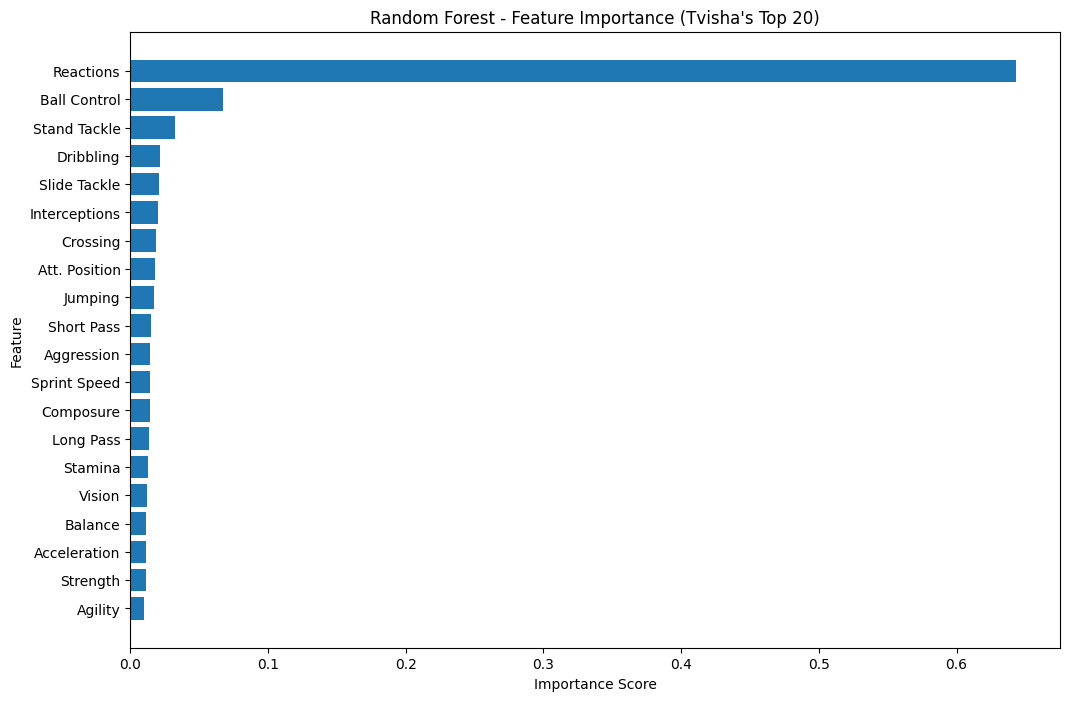

In [ ]:
# Subset data for Tvisha's top 20 features
tvisha_features = ['Ball Control', 'Dribbling', 'Slide Tackle', 'Stand Tackle', 'Aggression',
                 'Reactions', 'Att. Position', 'Interceptions', 'Vision', 'Composure',
                 'Crossing', 'Short Pass', 'Long Pass', 'Acceleration', 'Stamina',
                 'Strength', 'Balance', 'Sprint Speed', 'Agility', 'Jumping']

X_tvisha_train = X_train[tvisha_features]
X_tvisha_test = X_test[tvisha_features]

# Scale the data
scaler = StandardScaler()
X_tvisha_train_scaled = scaler.fit_transform(X_tvisha_train)  # Fit on train data
X_tvisha_test_scaled = scaler.transform(X_tvisha_test)        # Transform test data

# Train the Random Forest model
rf_tvisha_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_tvisha_model.fit(X_tvisha_train_scaled, y_train)

# Predict on test data
rf_tvisha_y_pred = rf_tvisha_model.predict(X_tvisha_test_scaled)

# Calculate metrics
rf_tvisha_mse = mean_squared_error(y_test, rf_tvisha_y_pred)
rf_tvisha_r2 = r2_score(y_test, rf_tvisha_y_pred)

# Print performance metrics
print(f"Tvisha's Top 20 Features - Mean Squared Error: {rf_tvisha_mse}")
print(f"Tvisha's Top 20 Features - R² Score: {rf_tvisha_r2}")

# Visualize feature importance for Tvisha's top 20 features
importances = rf_tvisha_model.feature_importances_
feature_names = X_tvisha_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.barh(range(len(importances)), importances[indices], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Random Forest - Feature Importance (Tvisha's Top 20)")
plt.gca().invert_yaxis()
plt.show()